# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [10]:
# your answer here

import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [32]:
# your answer here

employee = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week4/lab-pivot-table-and-correlation/your_code/data/Employee.csv')
employee


,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [9]:
# Method 1
# your answer here

employee.groupby(['Department'])['Salary'].mean()


Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [11]:
# Method 2
# your answer here

pd.pivot_table(employee,index=["Department"],values=["Salary"],aggfunc=[np.mean])


,mean
,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [20]:
# your answer here

pd.pivot_table(employee,index=["Department","Title"],values=["Salary"],aggfunc=[np.mean])



mean
                     Salary
Department Title           
HR         VP          70.0
           analyst     32.5
IT         VP          70.0
           analyst     32.5
           associate   60.0
Sales      associate   55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [14]:
# your answer here

pd.pivot_table(employee,index=["Title"],values=["Salary","Years"])



,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [28]:
# your answer here

pd.pivot_table(employee,index=["Department","Title"],values=["Salary","Name"],aggfunc=[np.mean,len])




mean  len       
                     Salary Name Salary
Department Title                       
HR         VP          70.0    1      1
           analyst     32.5    2      2
IT         VP          70.0    1      1
           analyst     32.5    2      2
           associate   60.0    1      1
Sales      associate   55.0    2      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [29]:
# your answer here

pd.pivot_table(employee,index=["Department","Title"],values=["Salary"],aggfunc=[np.median,np.min,np.max,np.std])

# the VP ans associate lines have only 1 employee and therefore median, max and minimum are equal. Consequently the standard deviation cannot be calculated

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [72]:
# your answer here

# the following code should replace the NaN by 0

df = pd.pivot_table(employee,index=["Department","Title"],values=["Salary"],aggfunc=[np.median,np.min,np.max,np.std]).fillna(0)
df

median   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [49]:
# your answer here

pd.pivot_table(employee,index=["Department","Title"],values=["Salary","Name"],aggfunc={"Salary": np.sum, "Name": len},margins = True)

Name  Salary
Department Title                  
HR         VP            1      70
           analyst       2      65
IT         VP            1      70
           analyst       2      65
           associate     1      60
Sales      associate     2     110
All                      9     440

#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [51]:
# your answer here

pd.pivot_table(employee,index=["Department","Title"],values=["Salary","Years"],aggfunc={"Salary": np.mean, "Years": np.sum})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [52]:
# your answer here

fitbit = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week4/lab-pivot-table-and-correlation/your_code/data/Fitbit.csv')


In [53]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [60]:
# your answer here

fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [58]:
# your answer here

fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [61]:
# your answer here

fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

In [62]:
# your answer here
import matplotlib.pyplot as plt


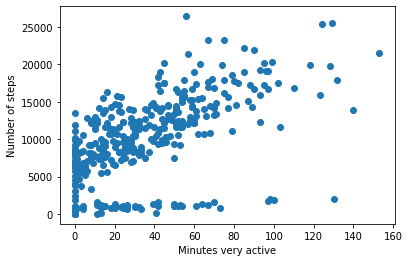

In [65]:
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel("Minutes very active")
plt.ylabel("Number of steps")
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here

# From the scatter plot one can observe that there seems to be a positive linear relationship between minutes very active and number of steps
# We also observe that there might be "noise data" at axis = 0 min and y =0 steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [66]:
# your answer here

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])



0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

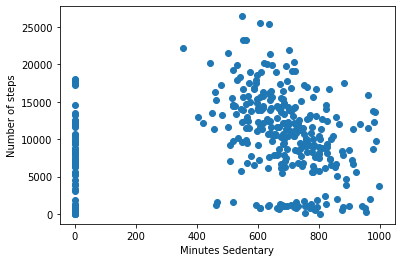

In [67]:
# your answer here

plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel("Minutes Sedentary")
plt.ylabel("Number of steps")
plt.show()

# the correlation is less obvious in this case compared to the previous one
# same observation as previously regarding x = 0 and y = 0, needs investigation

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [68]:
# your answer here

fitbit['MinutesOfSleep'].corr(fitbit['Steps'])


0.1309856595083638

Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

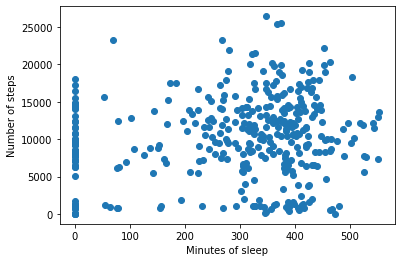

In [69]:
# your answer here

plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel("Minutes of sleep")
plt.ylabel("Number of steps")
plt.show()

# Again the correlation between the 2 variables is not obvious. 
# same observation as previously regarding x = 0 and y = 0, needs investigation


#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [75]:
# your answer here

column = ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

corr_fit = fitbit[column].corr()
corr_fit


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


In [77]:
import seaborn as sns


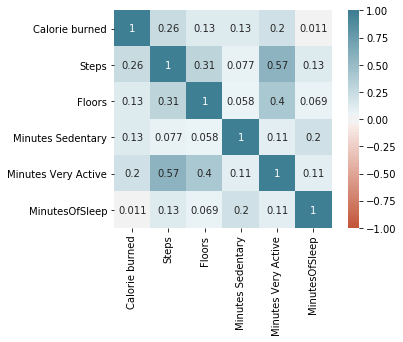

In [82]:
ax = sns.heatmap(
    corr_fit, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True)




#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [86]:
# your answer here

corr_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [87]:
# your answer here


time_grades = pd.read_csv('/Users/pietervierstraete/Desktop/Ironhack/week4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')



In [90]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

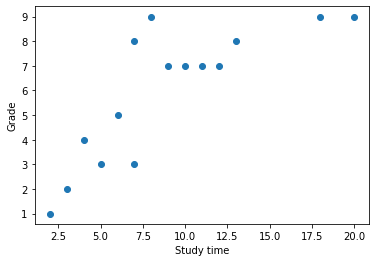

In [92]:
# your answer here
# Plotting the scatter gives a visualization of the dataset. However, if grades are repeated the weight of a specific repeating (x,y) will not be visible 

plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.xlabel("Study time")
plt.ylabel("Grade")
plt.show()


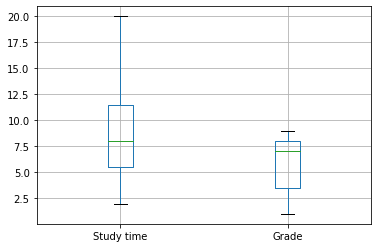

In [95]:
# the boxplot gives a visual overview of the dataframe

time_grades.boxplot()
plt.show()


#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [96]:
# your answer here
# from the scatter plot there seems to be a linear positive correlation between study time and results

time_grades.corr()

# the Pearson correlation is equal to 79,8% which is a very high linear correlation between one hour of work and the grade

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [97]:
# Spearman correlation measures the non-linear correlation

time_grades.corr(method = 'spearman')

# The Spearman correlation is equal to 82% which 

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [ ]:
# your answer here

# see scatter plot above


#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

# Spearman correlation evaluates the correlation between ranks of two variables while Pearson evaluates the linear correlation between two variables